In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 將數據讀入 DataFrame
path = r'C:\Users\User\Desktop\Sector Allocation Framework under Reinforcement Learning Rotation\sector_return.csv'
df_returns = pd.read_csv(path)
df_returns = df_returns.set_index('datetime')

df_returns

,光電業,其他,化學工業,半導體,居家生活,建材營造,數位雲端,文化創意業,材料,汽車工業,...,觀光餐旅,資訊服務業,通信網路業,金融業,鋼鐵工業,電子通路業,電子零組件,電機機械,電腦及週邊,食品工業
datetime,,,,,,,,,,,,,,,,,,,,,
2013-05-22,0.076711,0.021258,0.006285,0.029453,0.029403,0.035108,0.097801,0.019457,0.020763,0.024767,...,0.019078,0.028848,0.022083,0.028258,0.026185,0.041874,0.034240,0.023174,0.029762,0.033710
2013-05-29,0.001892,0.003983,0.000813,0.003443,0.004875,0.003362,0.056084,0.024891,0.004664,0.015721,...,-0.006231,0.023339,0.003004,-0.010884,0.010590,0.000107,0.003062,0.010621,0.005743,0.013325
2013-06-05,0.001344,0.005505,-0.000251,0.002354,0.019047,0.022704,0.035149,-0.016564,-0.004564,0.000825,...,-0.018731,0.010346,-0.004086,-0.007915,-0.007952,-0.000266,-0.005270,-0.003669,0.004273,0.003483
2013-06-13,-0.052111,-0.022663,-0.011599,-0.047093,-0.019819,-0.029413,-0.027210,-0.025924,-0.011819,-0.030346,...,-0.014164,0.017006,-0.032391,-0.006229,-0.014272,-0.014895,-0.028386,-0.021952,-0.032365,-0.018387
2013-06-20,-0.007445,0.008745,0.018480,0.005438,0.000333,-0.015432,-0.000821,-0.016688,0.008465,-0.013938,...,-0.001873,0.044164,-0.001975,-0.009522,-0.006132,-0.007296,0.001010,0.006422,0.009225,0.002924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-21,0.033222,0.006831,0.002612,0.016581,-0.000365,0.028659,0.019725,0.009023,0.006075,0.026140,...,0.001460,0.013854,0.021684,0.017653,0.023827,0.039995,0.023779,0.011471,0.029995,0.020556
2024-05-28,0.033575,0.005347,0.004317,0.046760,-0.002653,-0.015558,0.011243,0.002525,0.001873,0.011768,...,0.010422,0.016564,0.044173,0.000724,-0.009262,0.036353,0.030936,0.025737,0.053148,-0.007067
2024-06-04,-0.004807,0.003521,-0.001138,-0.000591,0.008363,0.052269,-0.003722,0.021293,-0.007581,-0.002662,...,-0.023981,0.021536,0.003525,-0.008406,-0.011110,0.017806,0.004073,0.018689,0.012005,0.009244


In [3]:
# 計算行業間的相關矩陣（基於收益率）
correlation_matrix = df_returns.corr()

# 計算行業距離矩陣
distance_matrix = 1 - correlation_matrix

# K-means

c:\Users\User\.conda\envs\factors_backtest\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


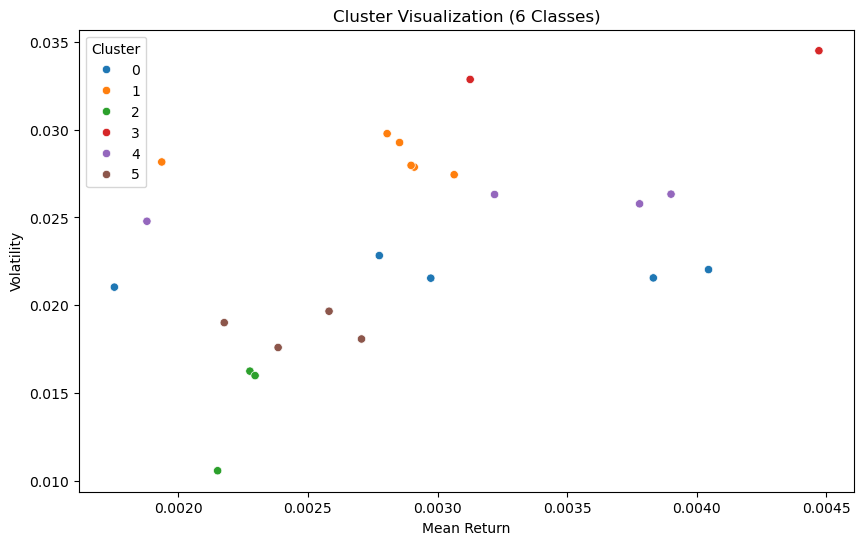

Cluster 0: ['材料', '綠能環保', '資訊服務業', '電子通路業', '電機機械']
Cluster 1: ['光電業', '數位雲端', '文化創意業', '汽車工業', '生技醫療', '通信網路業']
Cluster 2: ['其他', '油電燃氣業', '食品工業']
Cluster 3: ['半導體', '航運業']
Cluster 4: ['觀光餐旅', '鋼鐵工業', '電子零組件', '電腦及週邊']
Cluster 5: ['化學工業', '居家生活', '建材營造', '金融業']


C:\Users\User\AppData\Local\Temp\ipykernel_6968\2972971064.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_groups = features.groupby("Cluster").apply(lambda x: list(x.index))


In [4]:
# Step 2: 提取特徵（如行業的收益均值和波動率）
features = pd.DataFrame({
    "mean_return": df_returns.mean(),
    "volatility": df_returns.std()
})

# Step 3: 聚類數設定為 6
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
features["Cluster"] = kmeans.fit_predict(features[["mean_return", "volatility"]])

# Step 4: 繪製聚類結果
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="mean_return", y="volatility", hue="Cluster",
    data=features, palette="tab10"
)
plt.title("Cluster Visualization (6 Classes)")
plt.xlabel("Mean Return")
plt.ylabel("Volatility")
plt.legend(title="Cluster")
plt.show()

# Step 5: 列出每一類中的行業
cluster_groups = features.groupby("Cluster").apply(lambda x: list(x.index))
for cluster_id, industries in cluster_groups.items():
    print(f"Cluster {cluster_id}: {industries}")

# 分三類

c:\Users\User\.conda\envs\factors_backtest\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


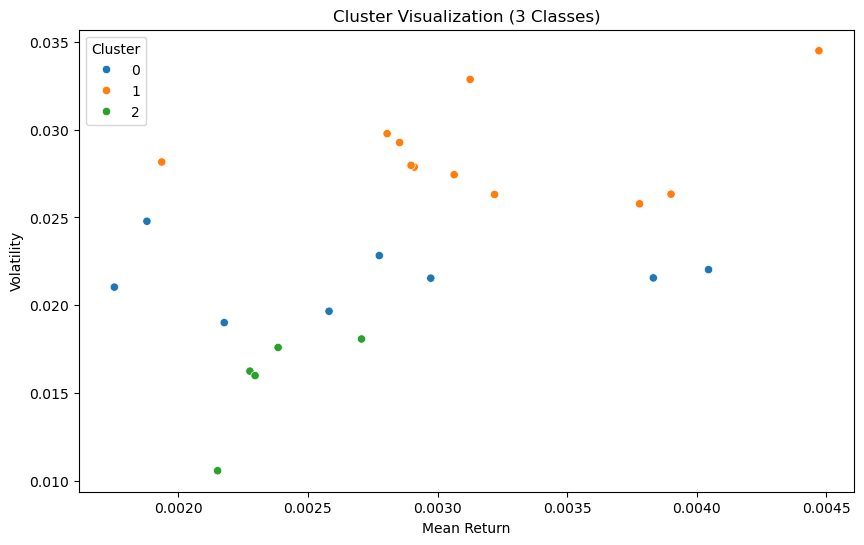

Cluster 0: ['化學工業', '居家生活', '材料', '綠能環保', '觀光餐旅', '資訊服務業', '電子通路業', '電機機械']
Cluster 1: ['光電業', '半導體', '數位雲端', '文化創意業', '汽車工業', '生技醫療', '航運業', '通信網路業', '鋼鐵工業', '電子零組件', '電腦及週邊']
Cluster 2: ['其他', '建材營造', '油電燃氣業', '金融業', '食品工業']


C:\Users\User\AppData\Local\Temp\ipykernel_6968\1827435304.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_groups = features.groupby("Cluster").apply(lambda x: list(x.index))


In [5]:
# Step 2: 提取特徵（如行業的收益均值和波動率）
features = pd.DataFrame({
    "mean_return": df_returns.mean(),
    "volatility": df_returns.std()
})

# Step 3: 聚類數設定為 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
features["Cluster"] = kmeans.fit_predict(features[["mean_return", "volatility"]])

# Step 4: 繪製聚類結果
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="mean_return", y="volatility", hue="Cluster",
    data=features, palette="tab10"
)
plt.title("Cluster Visualization (3 Classes)")
plt.xlabel("Mean Return")
plt.ylabel("Volatility")
plt.legend(title="Cluster")
plt.show()

# Step 5: 列出每一類中的行業
cluster_groups = features.groupby("Cluster").apply(lambda x: list(x.index))
for cluster_id, industries in cluster_groups.items():
    print(f"Cluster {cluster_id}: {industries}")